In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import _california_housing

In [5]:
california = fetch_california_housing()

cdf = pd.DataFrame(data=california.data, columns = california.feature_names)

In [9]:
cdf

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [10]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
cdf.describe(include = 'all')

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

In [14]:
z = cdf.corr()
z

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000

<AxesSubplot:>

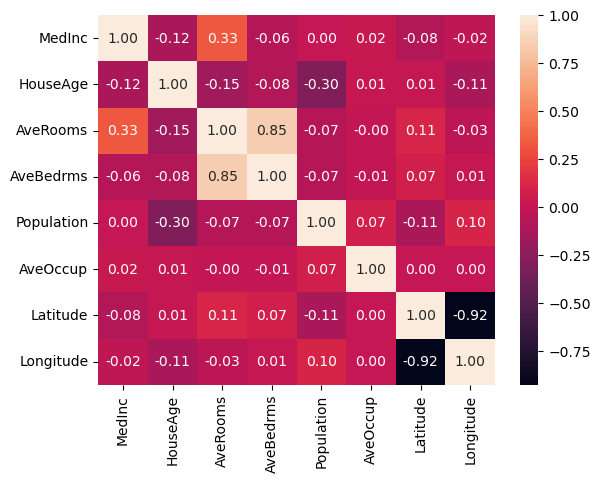

In [16]:
sns.heatmap(data=z, annot=True, fmt=".2f")

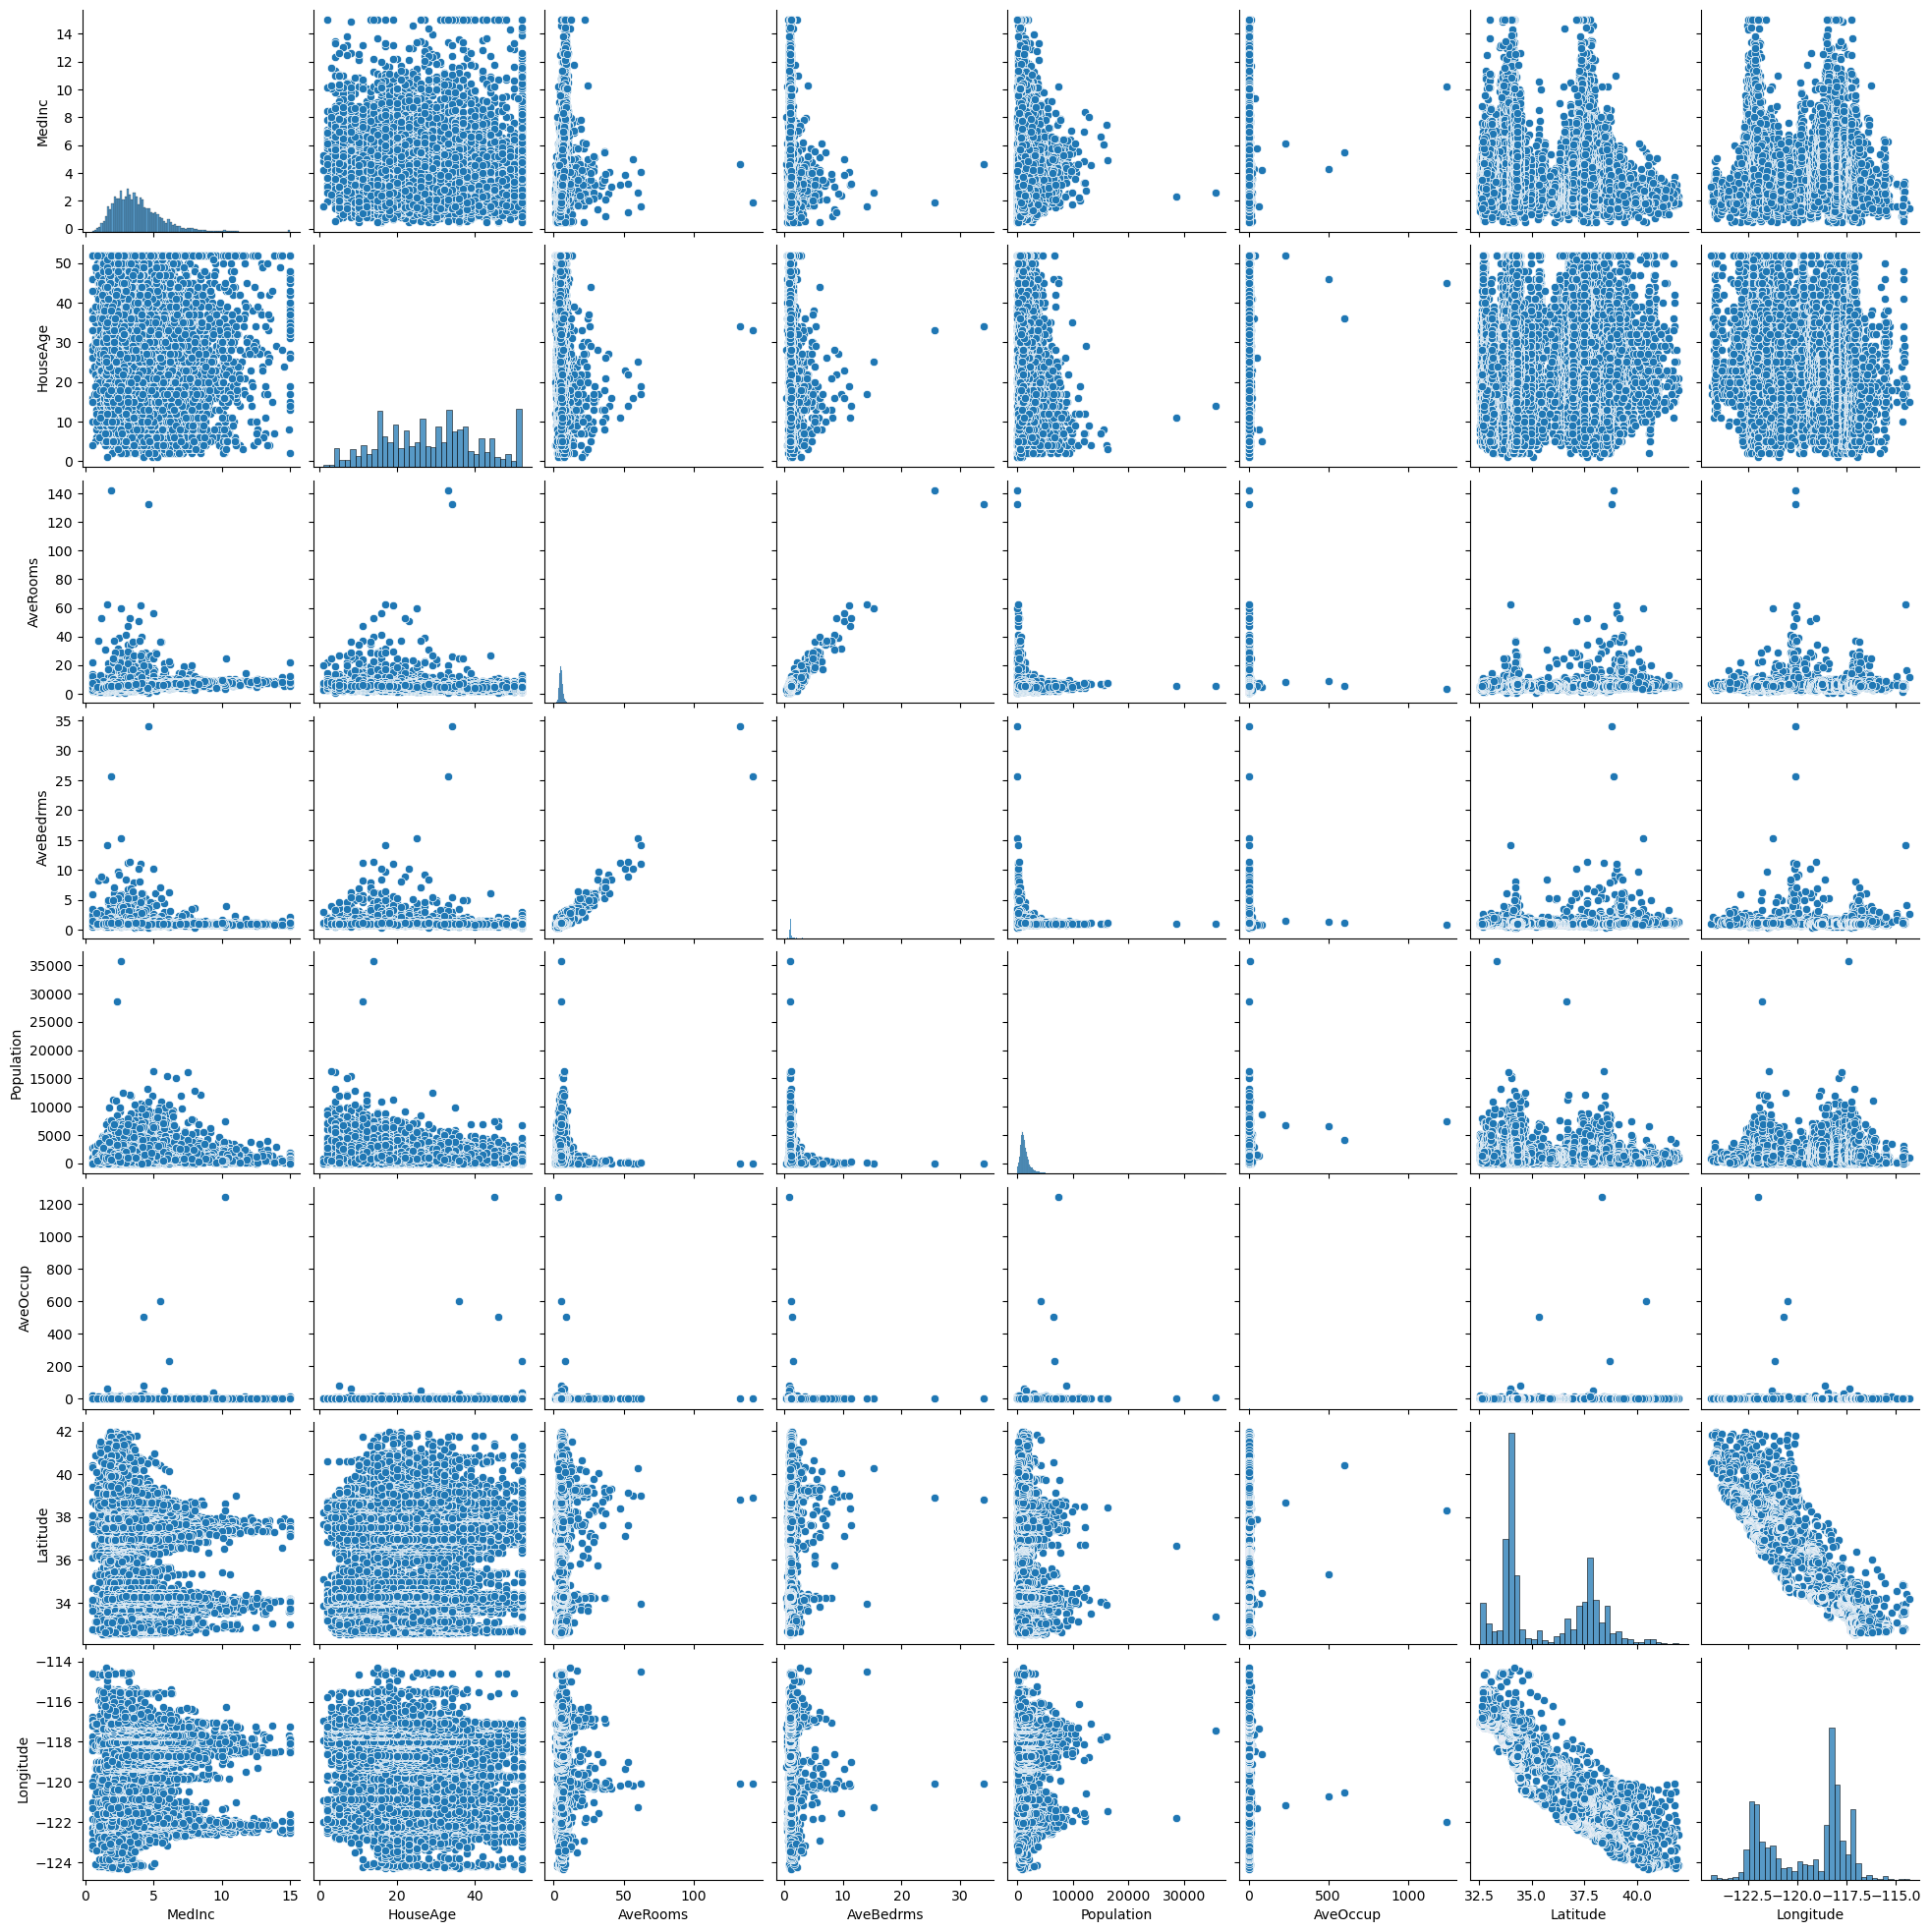

In [18]:
sns.pairplot(data = cdf)

In [29]:
# Create a scatter plot on the map using latitude and longitude

fig = px.scatter_mapbox(cdf, lat="Latitude", lon="Longitude",
                        color="HouseAge", size="AveRooms",
                        color_continuous_scale=px.colors.sequential.YlGnBu,
                        size_max=15, zoom=5)

# Update map layout
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=5, mapbox_center={"lat": 36.7783, "lon": -119.4179},
                  margin={"r":0,"t":0,"l":0,"b":0},
                  title="California Housing Data - House Age vs AveRooms")

# Show the map
fig.show()

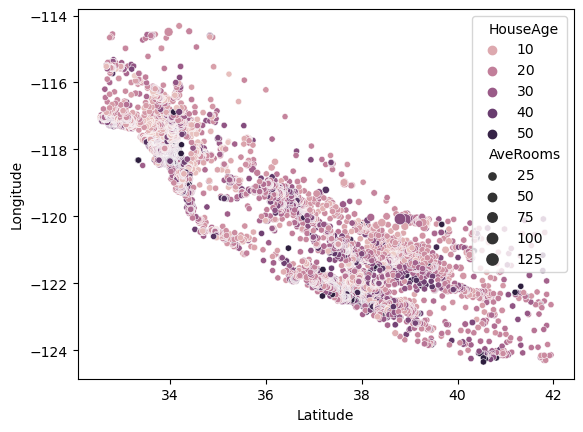

In [37]:
sns.scatterplot(x= 'Latitude', y= 'Longitude', hue='HouseAge', size='AveRooms', data=cdf);
plt.show()